# HW 13 Report Part B Minh Nguyen

In [14]:
import argparse
import os
import numpy as np
import cv2
from keras.models import load_model

In [15]:
from src.labels import labels
from src.bound_box import BoundBox
from src.yolov3_model import make_yolov3_model
from src.weight_reader import WeightReader
from src.utils import (
    decode_netout,
    draw_boxes,
    get_boxes,
    load_image_pixels,
    do_nms,
    correct_yolo_boxes,
)

In [16]:
# make the yolov3 model to predict 80 classes on COCO
yolov3 = make_yolov3_model()

In [17]:
# load the weights trained on COCO into the model

weights_path = 'yolov3.weights'

weight_reader = WeightReader(weights_path)
weight_reader.load_weights(yolov3)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [18]:
# save the model to file
yolov3.save('model.h5')

In [19]:
# load yolov3 model and perform object detection
# based on https://github.com/experiencor/keras-yolo3

# load yolov3 model
model = load_model('model.h5')
# define the expected input shape for the model
input_w, input_h = 416, 416

# inputs folder that contains the image
inputs_folder = 'inputs'

In [20]:
# pipeline
def pipeline(filename, nms_thresh=0.5):
    print("Processing image:", filename)
    # define our new photo
    photo_filename = os.path.join(inputs_folder, filename)

    # load and prepare image
    image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
    # make prediction
    yhat = model.predict(image)
    # summarize the shape of the list of arrays
    print([a.shape for a in yhat])
    # define the anchors
    anchors = [
        [116, 90, 156, 198, 373, 326],
        [30, 61, 62, 45, 59, 119],
        [10, 13, 16, 30, 33, 23],
    ]
    # define the probability threshold for detected objects
    class_threshold = 0.6
    boxes = list()
    for i in range(len(yhat)):
        # decode the output of the network
        boxes += decode_netout(
            yhat[i][0], anchors[i], class_threshold, input_h, input_w
        )
    # correct the sizes of the bounding boxes for the shape of the image
    correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
    # suppress non-maximal boxes
    do_nms(boxes, nms_thresh)

    # get the details of the detected objects
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

    # summarize what we found
    for i in range(len(v_boxes)):
        print(v_labels[i], v_scores[i])

    # draw what we found
    draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

Processing image: car.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
car 99.68425035476685


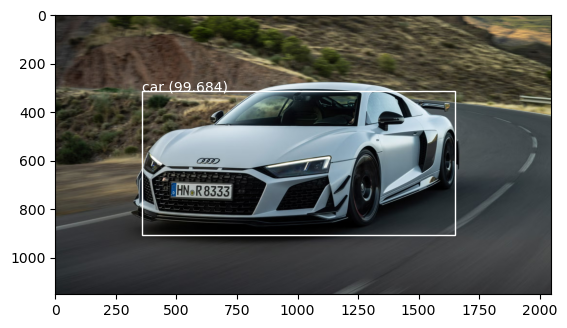

Processing image: animal.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
bear 79.70399856567383


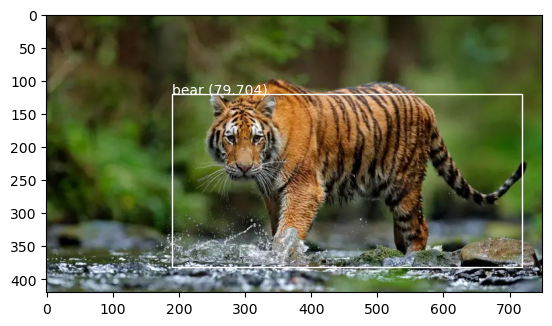

Processing image: people.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
person 99.66295957565308
person 99.98237490653992


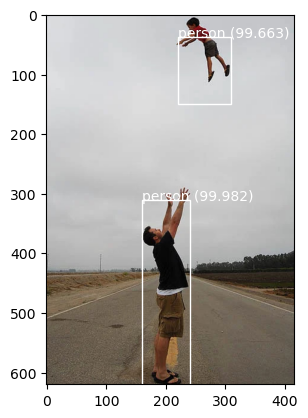

In [21]:
# Non-max suppressing = 0.5
for filename in os.listdir(inputs_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        pipeline(filename, nms_thresh=0.5)

3. What is the purpose of the non-max suppression?
- The purpose of non-max suppression is to eliminate redundant bounding boxes that overlap significantly with the highest scoring box. It helps in retaining only the most relevant bounding boxes for each detected object, therefore improving the accuracy of object detection. 

### NMS = 0.3

Processing image: car.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
car 99.68425035476685


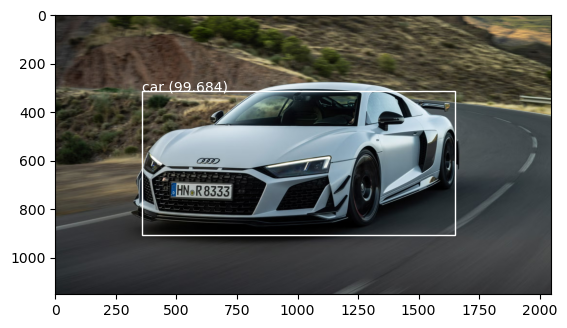

Processing image: animal.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
bear 79.70399856567383


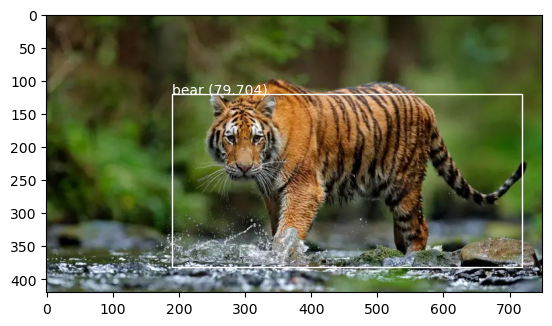

Processing image: people.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
person 99.66295957565308
person 99.98237490653992


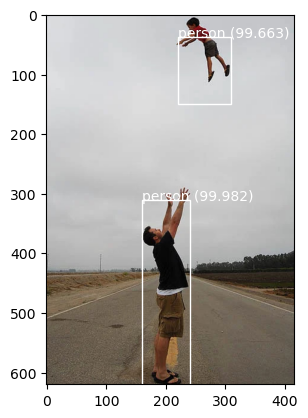

In [22]:
# Non-max suppression = 0.3
for filename in os.listdir(inputs_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        pipeline(filename, nms_thresh=0.3)

- With NMS set to 0.3, the model is still be able to detect the objects in the images pretty well. That probably because the images don't have too many objects in the same area. Therefore, even it retains a lot of bounding boxes, it doesn't affect the accuracy of the model by much.

### NMS = 0.8

Processing image: car.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
car 95.60511708259583
car 99.68425035476685
car 94.98623609542847
car 76.85739994049072


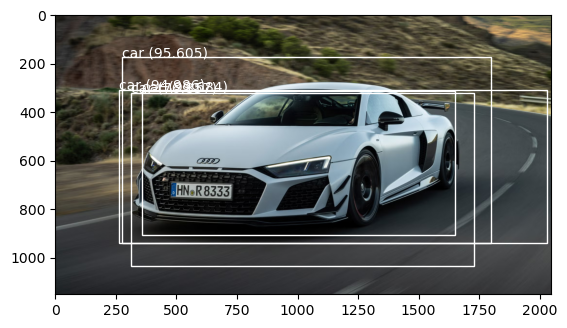

Processing image: animal.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
bear 79.70399856567383
bear 70.47642469406128


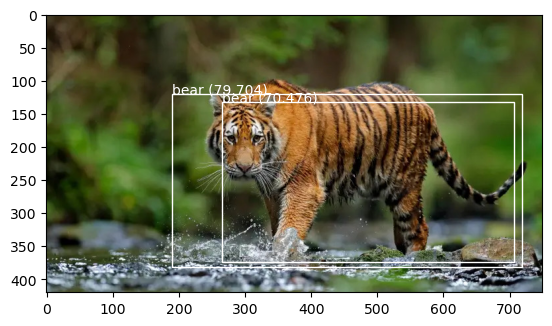

Processing image: people.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
person 99.66295957565308
person 77.12105512619019
person 99.98237490653992
person 70.307457447052


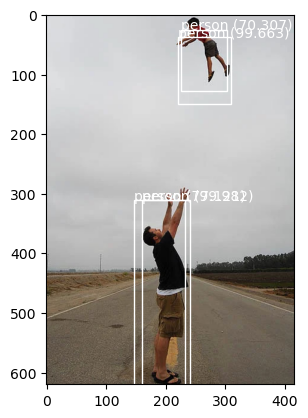

In [23]:
# Non-max suppression = 0.8
for filename in os.listdir(inputs_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        pipeline(filename, nms_thresh=0.8)

- With NMS set to 0.8, the model starts to leave more bounding boxes around the objects in the images. This is because the model is more strict about the overlap between bounding boxes. Even though it still detects the objects in the images clearly in this case, it is not as accurate as the NMS = 0.5. If the images have more objects in the same area, the model will probably miss some objects in the images, or can cause confusion between the objects.